In [1]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import confusion_matrix,precision_score,accuracy_score
import matplotlib.pyplot as plt 
import seaborn as sns

In [2]:
data=pd.read_csv("../data/Generated_data//gkaclassvisit_new_normalized.csv")
data=data[data['assessment']=='GKA Class Visit']
print(len(data))
data=data[data['question']!='?']
print(len(data))
data['answer']=data['answer'].map(lambda x: 0 if x=='No' else 1)
data['respondent_var']=data['respondent'].map(lambda x: 0 if x!='Akshara Staff' else 1)
clusters=data.groupby('cluster')
w_cluster_val=clusters['respondent_var'].mean()
data['w_cluster']=data['cluster'].map(lambda x: w_cluster_val[x])

152919
152918


In [3]:
#%%
print(len(data))
def func_uniques(df):
    print('*******')

    total=0
    for col in df.columns:
        nu=data[col].nunique()
        total+=nu
        print(col, nu)
    print('Total uniques', total)
    print('*******')

func_uniques(data)

152918
*******
state 1
district 15
block 69
cluster 840
institution_name 4583
institution_id 4644
grampanchayat 1200
assessment 1
questiongroup_id 1
class 6
date_of_visit 20336
respondent 15
respondentid 2746
comments 174
question 5
answer 2
question_id 5
respondent_var 2
w_cluster 329
Total uniques 34974
*******


In [4]:
features=['district','block','cluster','grampanchayat','class','question'] 
predictor=['answer']
func_uniques(data[features])
X=pd.get_dummies(data[features])
y=data[predictor]
weights=data['w_cluster']

*******
district 15
block 69
cluster 840
grampanchayat 1200
class 6
question 5
Total uniques 2135
*******


In [5]:
#%% Data division 
X_akshara=X[data['respondent']=='Akshara Staff'].values
y_akshara=y[data['respondent']=='Akshara Staff'].values
w_akshara=weights[data['respondent']=='Akshara Staff'].values

X_nonAkshara=X[data['respondent']!='Akshara Staff'].values
y_nonAkshara=y[data['respondent']!='Akshara Staff'].values

X_train, X_test, y_train, y_test,w_train,_ =train_test_split(
        X_akshara, y_akshara, w_akshara,test_size=0.20, random_state=42)

In [6]:
clf = RandomForestClassifier(class_weight={0:len(y_train)-y_train.sum() ,1:y_train.sum()})
clf.fit(X_train,y_train,w_train)

/Users/cthimmis/Applications/eng-sci/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:2: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  


RandomForestClassifier(bootstrap=True, class_weight={0: 12764, 1: 20848},
            criterion='gini', max_depth=None, max_features='auto',
            max_leaf_nodes=None, min_impurity_decrease=0.0,
            min_impurity_split=None, min_samples_leaf=1,
            min_samples_split=2, min_weight_fraction_leaf=0.0,
            n_estimators=10, n_jobs=1, oob_score=False, random_state=None,
            verbose=0, warm_start=False)

******************************************
Training Data


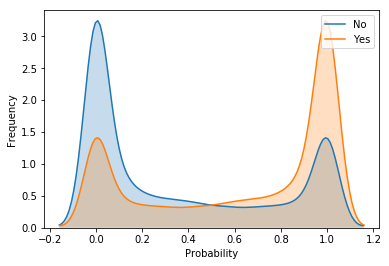

Confusion Matrix:
[[10452  2312]
 [ 1038 19810]]
[[31.09603713  6.87849578]
 [ 3.08818279 58.9372843 ]]
Accuracy Score:
90.03332143282161
Precision Score:
89.54886538287677


In [7]:
print('******************************************')
print('Training Data')
y_train_pred=clf.predict(X_train)
prob_train=clf.predict_proba(X_train)
sns.kdeplot(prob_train[:,0],shade=True,label='No')
sns.kdeplot(prob_train[:,1],shade=True,label='Yes')
#plt.hist(prob_train[:,0], 20, alpha=0.3, label='No')
#plt.hist(prob_train[:,1],20,  alpha=0.7, label='Yes')
plt.xlabel('Probability')
plt.ylabel('Frequency')
plt.legend(loc='upper right')
plt.show()
#plt.figure(figsize=(30,5))
#plt.plot(range(len(X_train)),prob_train[:,0], '*')
#plt.plot(range(len(X_train)),prob_train[:,1], 'o')
#sns.kdeplot(prob_train[:,0], prob_train[:,0], n_levels=10, cmap="Purples_d")
#plt.show()
#print(prob_train)
cm_train=confusion_matrix(y_train,y_train_pred)
print('Confusion Matrix:')
print(cm_train)
print(cm_train/len(y_train_pred)*100)
print('Accuracy Score:')
print(accuracy_score(y_train,y_train_pred)*100)
print('Precision Score:')
print(precision_score(y_train,y_train_pred)*100)

******************************************
Testing Data
[[0.28066242 0.71933758]
 [0.         1.        ]
 [0.         1.        ]
 ...
 [0.         1.        ]
 [0.         1.        ]
 [0.17294077 0.82705923]]


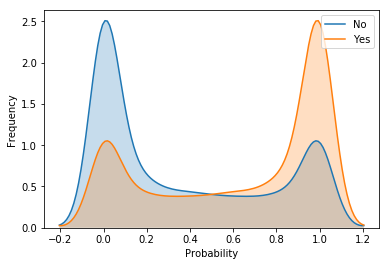

Confusion Matrix:
[[2421  781]
 [ 526 4675]]
[[28.81113888  9.29429965]
 [ 6.25966917 55.6348923 ]]
Accuracy Score:
84.44603117934071
Precision Score:
85.68548387096774


In [8]:
print('******************************************')
print('Testing Data')
y_test_pred=clf.predict(X_test)
prob_test=clf.predict_proba(X_test)
print(prob_test)
sns.kdeplot(prob_test[:,0],shade=True, label='No')
sns.kdeplot(prob_test[:,1],shade=True, label='Yes')
plt.legend(loc='upper right')
plt.xlabel('Probability')
plt.ylabel('Frequency')
plt.show()
cm_test=confusion_matrix(y_test,y_test_pred)
print('Confusion Matrix:')
print(cm_test)
print(cm_test/len(y_test_pred)*100)
print('Accuracy Score:')
print(accuracy_score(y_test,y_test_pred)*100)
print('Precision Score:')
print(precision_score(y_test,y_test_pred)*100)

******************************************
Testing Non Akshara Data


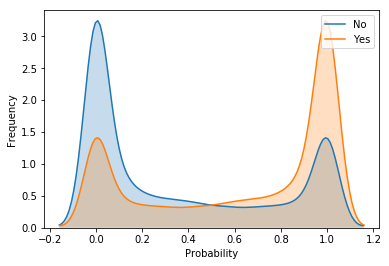

Confusion Matrix:
[[ 3549  4667]
 [30029 72658]]
[[ 3.20009378  4.20818192]
 [27.07681487 65.51490943]]
Accuracy Score:
68.71500320099545
Precision Score:
93.96443582282573
******************************************
Number of "Yes" by non Akshara team 102687
Number of "No" by non Akshara team 8216
Predicted number of "Yes" by non Akshara team 77325
Predicted number of "No" by non Akshara team 33578
Fudge factor: 27.076814874259487


In [9]:
print('******************************************')
print('Testing Non Akshara Data')
y_na_pred=clf.predict(X_nonAkshara)
prob_nonA=clf.predict_proba(X_train)
sns.kdeplot(prob_nonA[:,0],shade=True, label='No')
sns.kdeplot(prob_nonA[:,1],shade=True, label='Yes')
plt.legend(loc='upper right')
plt.xlabel('Probability')
plt.ylabel('Frequency')
plt.show()
cm_na=confusion_matrix(y_nonAkshara,y_na_pred)
print('Confusion Matrix:')
print(cm_na)
print(cm_na/len(y_na_pred)*100)
print('Accuracy Score:')
print(accuracy_score(y_nonAkshara,y_na_pred)*100)
print('Precision Score:')
print(precision_score(y_nonAkshara,y_na_pred)*100)
print('******************************************')
print('Number of "Yes" by non Akshara team', y_nonAkshara.sum())
print('Number of "No" by non Akshara team', len(y_nonAkshara)-y_nonAkshara.sum())
print('Predicted number of "Yes" by non Akshara team', y_na_pred.sum())
print('Predicted number of "No" by non Akshara team', len(y_nonAkshara)-y_na_pred.sum())
print('Fudge factor:', cm_na[1][0]/len(y_nonAkshara)*100)

******************************************
All Data


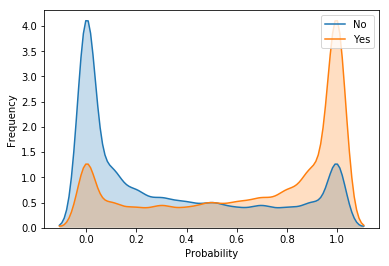

Confusion Matrix:
[[16422  7760]
 [31593 97143]]
[[10.73908892  5.07461515]
 [20.66009234 63.52620359]]
Accuracy Score:
74.26529250971109
Precision Score:
92.60269010419148
******************************************
Number of "Yes" by non Akshara team 128736
Number of "No" by non Akshara team 24182
Predicted number of "Yes" by non Akshara team 104903
Predicted number of "No" by non Akshara team 48015
Fudge factor: 20.660092337069543


In [10]:
print('******************************************')
print('All Data')
y_all_pred=clf.predict(X)
prob_A=clf.predict_proba(X)
sns.kdeplot(prob_A[:,0],shade=True, label='No')
sns.kdeplot(prob_A[:,1],shade=True, label='Yes')
plt.legend(loc='upper right')
plt.xlabel('Probability')
plt.ylabel('Frequency')
plt.show()
cm_all=confusion_matrix(y,y_all_pred)

print('Confusion Matrix:')

print(cm_all)
print(cm_all/len(y_all_pred)*100)
print('Accuracy Score:')
print(accuracy_score(y,y_all_pred)*100)
print('Precision Score:')
print(precision_score(y,y_all_pred)*100)
print('******************************************')
print('Number of "Yes" by non Akshara team', y.sum()[0])
print('Number of "No" by non Akshara team', len(y)-y.sum()[0])
print('Predicted number of "Yes" by non Akshara team', y_all_pred.sum())
print('Predicted number of "No" by non Akshara team', len(y)-y_all_pred.sum())
print('Fudge factor:', cm_all[1][0]/len(y)*100)

In [11]:
data['Predicted Answer']=y_all_pred
data['Prob. No']=prob_A[:,0]
data['Prob. Yes']=prob_A[:,1]
data.to_excel('../data/Generated_data/gkaclassvisit_predictions.xlsx')